# Installations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data Exploration & Preprocessing

In [2]:
# List all files in the directory
csv_files = [f"dataset/{f}" for f in os.listdir("dataset")]
dfs = [pd.read_csv(f) for f in csv_files]

# Combining dataframes
df = pd.concat(dfs, ignore_index=True)

# Sanitizing the headers
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

# Handling infinities
df = df.replace([np.inf, -np.inf], np.nan)

# Handling very large numbers with windsorization
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

print(df.head())

   destination port  flow duration  total fwd packets  total backward packets  \
0             54865            3.0                  2                       0   
1             55054          109.0                  1                       1   
2             55055           52.0                  1                       1   
3             46236           34.0                  1                       1   
4             54863            3.0                  2                       0   

   total length of fwd packets  total length of bwd packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   fwd packet length max  fwd packet length min  fwd packet length mean  \
0                      6                      6            

In [3]:
X = df.drop(columns="label")
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 67,
    stratify = y
)

# Model Training

In [4]:
rf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    random_state = 67,
    n_jobs = -1,
    class_weight = "balanced"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Model Evaluation

In [5]:
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Classification Report:


C:\Users\rayan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rayan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    454620
                       Bot       0.90      0.73      0.81       393
                      DDoS       1.00      1.00      1.00     25606
             DoS GoldenEye       1.00      1.00      1.00      2059
                  DoS Hulk       1.00      1.00      1.00     46215
          DoS Slowhttptest       0.99      0.99      0.99      1100
             DoS slowloris       1.00      0.99      0.99      1159
               FTP-Patator       1.00      1.00      1.00      1588
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       1.00      0.57      0.73         7
                  PortScan       0.99      1.00      1.00     31786
               SSH-Patator       1.00      1.00      1.00      1179
  Web Attack � Brute Force       0.74      0.81      0.77       301
Web Attack � Sql Injection       0.00      0.00

C:\Users\rayan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


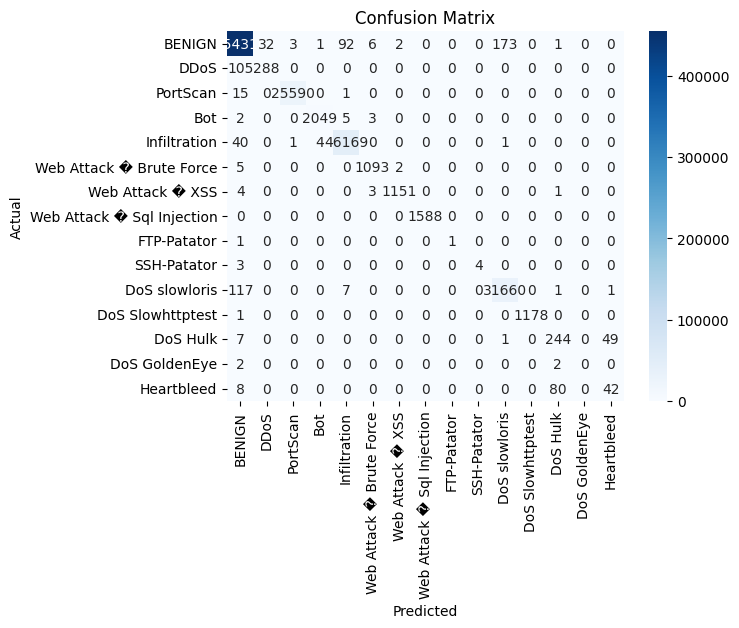

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

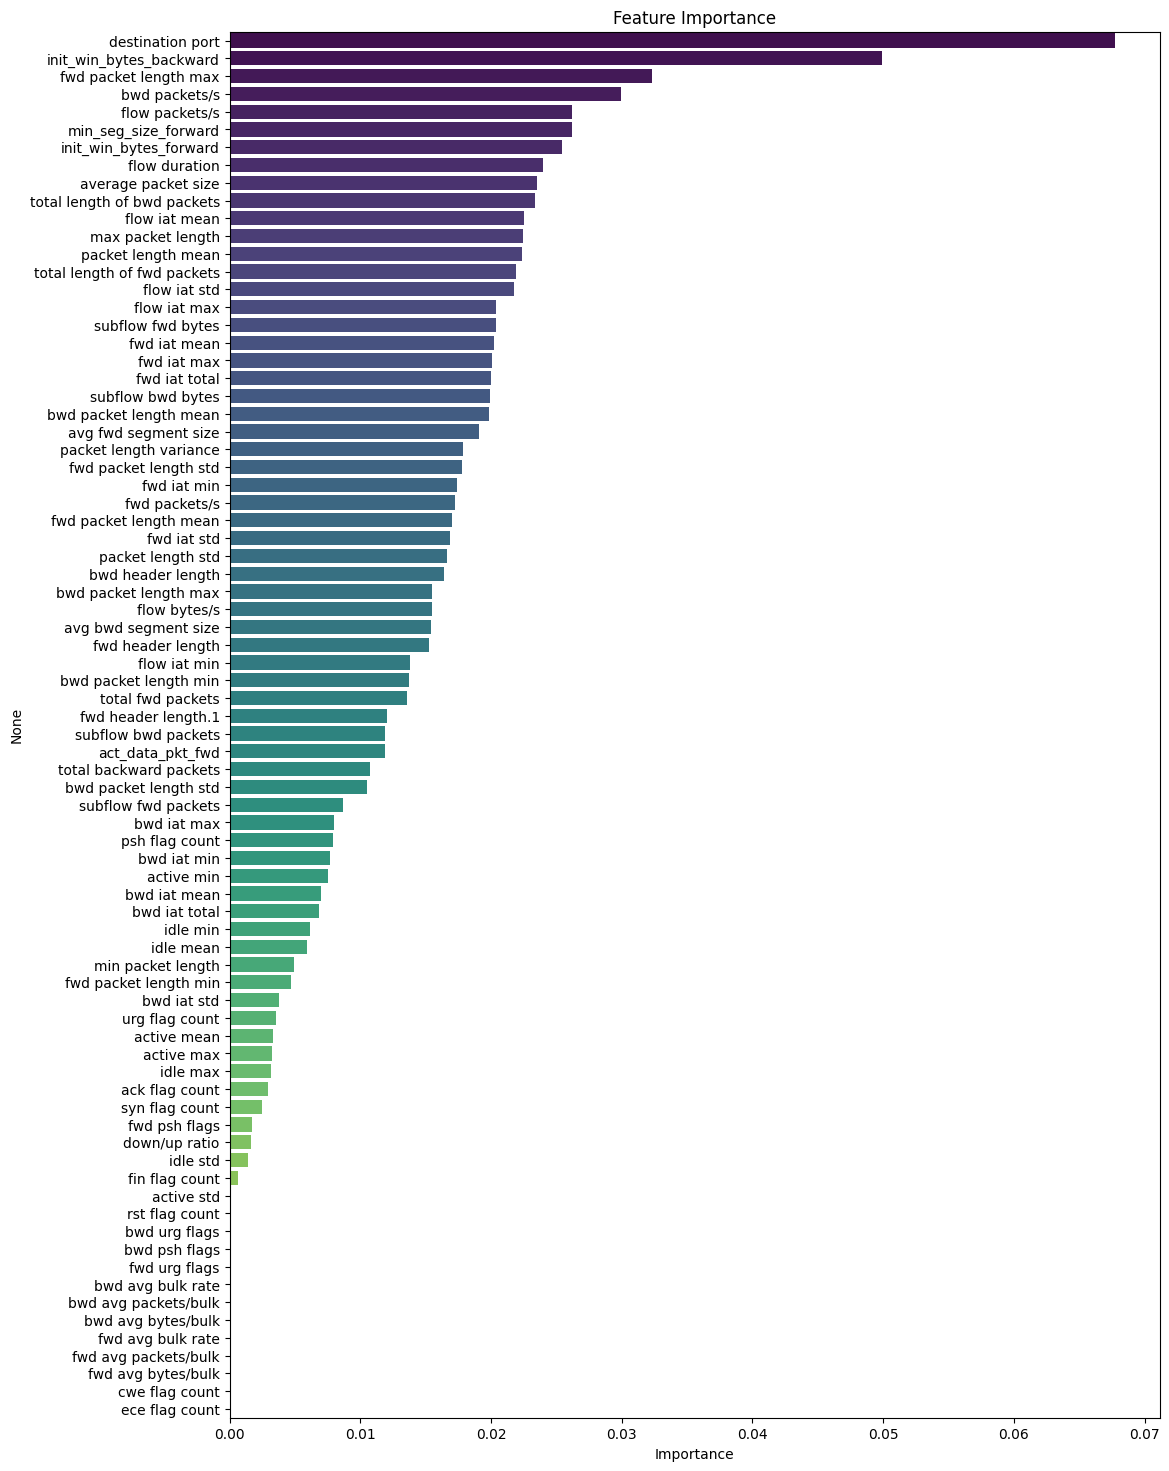

In [14]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
plt.figure(figsize=(12, 18))
sns.barplot(x="Importance", y=feature_importances.index, data=feature_importances, palette="viridis", hue=feature_importances.index, legend=False)
plt.title("Feature Importance")
plt.show()